<a href="https://colab.research.google.com/github/raohxxx/TelecomX_Challenge/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción
###carga de datos desde la web

In [29]:
import pandas as pd
import requests

# Leer JSON desde la URL
url3 = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url3)
datos_json = response.json()

# Crear DataFrame original
df_original = pd.DataFrame(datos_json)

# Columnas a normalizar
cols_a_normalizar = ['customer', 'phone', 'internet', 'account']

# Diccionario para guardar DataFrames normalizados
dfs_normalizados = {}

for col in cols_a_normalizar:
    if col in df_original.columns:
        df_norm = pd.json_normalize(df_original[col])
        df_norm.columns = [f"{col}_{subcol}" for subcol in df_norm.columns]
        dfs_normalizados[col] = df_norm
    else:
        print(f"⚠️ Columna '{col}' no encontrada en el DataFrame original")

# Concatenar DataFrames normalizados
df_final = pd.concat(dfs_normalizados.values(), axis=1)

# Agregar columnas customerID y churn
for col in ['customerID', 'Churn']:
    if col in df_original.columns:
        df_final[col] = df_original[col]
    else:
        print(f"⚠️ Columna '{col}' no encontrada en el DataFrame original")

# Reordenar columnas: customerID y churn al inicio
columnas = ['customerID', 'Churn'] + [col for col in df_final.columns if col not in ['customerID', 'Churn']]
df_final = df_final[columnas]

# Mostrar información final
print(df_final.info())
df_final.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


#🔧 Transformación

###escoger columnas categoricas

In [30]:
columnas=list(df_final.columns)
# Nombres de las columnas que quieres remover de la lista
columnas_a_remover = ['customerID', 'customer_SeniorCitizen', 'account_Charges.Monthly', 'account_Charges.Total']

# Remover las columnas de la lista 'columnas'
for col_nombre in columnas_a_remover:
    if col_nombre in columnas: # Verificar si la columna está en la lista antes de remover
        columnas.remove(col_nombre)

# Ahora, la lista 'columnas' no contendrá las columnas que especificaste.
# Puedes imprimirla para verificar
print(columnas)

# Si quieres usar esta lista para crear una nueva lista de columnas categóricas
columnasCategory = columnas
print(columnasCategory)
#columnas_a_cambiar = ['columna1', 'columna2', 'columna3']
for columna in columnasCategory:
    df_final[columna] = df_final[columna].astype('category') # O el tipo de dato que necesites
df_final.info()

['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']
['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  

In [31]:
df_final.dtypes

,0
customerID,object
Churn,category
customer_gender,category
customer_SeniorCitizen,int64
customer_Partner,category
customer_Dependents,category
customer_tenure,category
phone_PhoneService,category
phone_MultipleLines,category
internet_InternetService,category


### Cambiar las columnas custmerID a string y account_Charges.Total to float

In [32]:
# Cambiar el tipo de la columna 'customerID' a string (str)
df_final['customerID'] = df_final['customerID'].astype(str)

# Cambiar el tipo de la columna 'account_Charges.Total' a float
# Es importante manejar posibles errores o valores no numéricos antes de la conversión a float
# Por ejemplo, puedes reemplazar valores no numéricos o usar errors='coerce'
df_final['account_Charges.Total'] = pd.to_numeric(df_final['account_Charges.Total'], errors='coerce')

# Si después de convertir a numérico hay NaNs (debido a errors='coerce'),
# puedes optar por rellenarlos si es necesario, por ejemplo, con 0
# df_final['account_Charges.Total'] = df_final['account_Charges.Total'].fillna(0)

# Para verificar los tipos de datos después de los cambios
print(df_final.dtypes)



customerID                     object
Churn                        category
customer_gender              category
customer_SeniorCitizen          int64
customer_Partner             category
customer_Dependents          category
customer_tenure              category
phone_PhoneService           category
phone_MultipleLines          category
internet_InternetService     category
internet_OnlineSecurity      category
internet_OnlineBackup        category
internet_DeviceProtection    category
internet_TechSupport         category
internet_StreamingTV         category
internet_StreamingMovies     category
account_Contract             category
account_PaperlessBilling     category
account_PaymentMethod        category
account_Charges.Monthly       float64
account_Charges.Total         float64
dtype: object


###verificacion de columnas con datos vacios

In [33]:
filas_vacias=df_final.isna().sum()
filas_vacias
nombre_de_la_columna = 'account_Charges.Total'  # Reemplaza con el nombre de tu columna

# Filtrar el DataFrame para mostrar solo las filas donde la columna especificada tiene valores nulos
filas_con_valores_vacios = df_final[df_final[nombre_de_la_columna].isna()]

# Para mostrar las filas encontradas
print(f"Filas con valores vacíos en la columna '{nombre_de_la_columna}':")
display(filas_con_valores_vacios)

# Opcionalmente, para saber cuántas filas son:
print(f"\nNúmero de filas con valores vacíos en '{nombre_de_la_columna}': {filas_con_valores_vacios.shape[0]}")

Filas con valores vacíos en la columna 'account_Charges.Total':


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN



Número de filas con valores vacíos en 'account_Charges.Total': 11


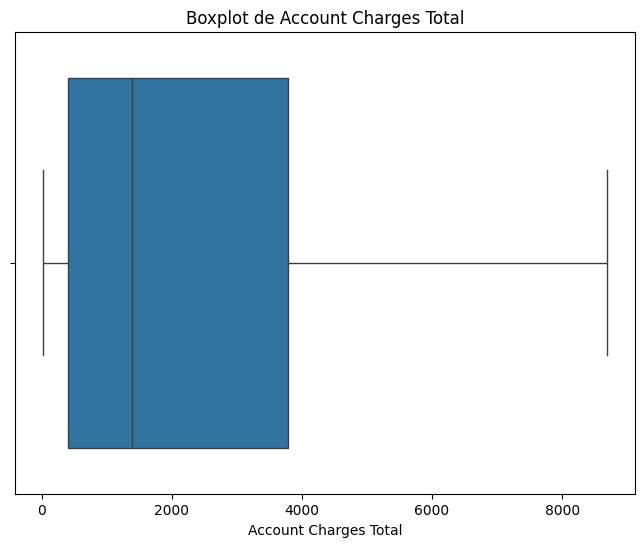

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crea el boxplot
plt.figure(figsize=(8, 6)) # Ajusta el tamaño de la figura si es necesario
sns.boxplot(x=df_final['account_Charges.Total'])
plt.title('Boxplot de Account Charges Total')
plt.xlabel('Account Charges Total')
plt.show()

In [35]:
filas_duplicadas=df_final.duplicated()
filas_duplicadas.value_counts()


,count
False,7267


#📊 Carga y análisis

#📄Informe final